# **Word Properties Data Assignment**

### October 19, 2025

## Sentiment Analysis of Free Responses to Short Narratives Stories Containing Different Levels of Disfluency

**1.1	Introduction**

Disfluencies are any interruption to the speech stream, such as filled pauses, repetitions, repairs, or silent pauses, and occur frequently in spoken language. Disfluencies are omnipresent in speech, with the natural production rate ranging from 2 to 26 disfluencies per 100 words, but despite this, most prior work on disfluency perception has examined spoken language with low overall rates of disfluency (e.g., 3 per 100 words) or standalone sentences containing one disfluency (Bortfield, 2001; Fox Tree, 1995). Low levels of disfluency have been associated with decreased perception of confidence, competence, and knowledge in the speaker (Brennan and Williams, 1995; Kirkland et al., 2023) while also increasing believability and likeability (Landwehr and Eckman, 2020; Hernandez and Preston, 2013; Trippas et al., 2014), but because they have most commonly been studied in isolation, we don’t know how speaker perceptions change as the speech disfluency density increases. To begin to understand how speaker perception shifts at higher levels, we can look to the stuttering literature, which suggests that it is only at high levels of stuttering that speaker perception is damaged (Panico et al., 2005). However, being given excuses for how a speaker is talking and hearing different densities may raise the threshold (Perez et al., 2025; Ward and Brenner, 2006). Additionally, stuttering-like disfluencies are characterized differently from non-stuttering-like disfluencies, consisting largely of single syllabic repetitions, prolongations, and tense pauses where non-stuttering-like disfluencies are more characterized by repairs, filled pauses, and multi-syllabic or phrase repetitions (Zebrowski et al., 2022). To better understand how speaker perception changes as non-stutterers use higher levels of disfluency, we collected free responses on what participants thought about different 5 speakers who spoke with 5 different disfluency densities. To analyze the relationship between speaker impressions and number of filled pauses in the passage, I will examine how positive and negative sentiment changes across the different condiitons using the NRC - bag of words - approach to sentiment analysis. For each free response, I will calculate the proportion of positive and negative words and run a linear mixed effects model to elucidate any relationship between the positive and negative sentiment scores and story condition.

**1.1.1	Research Questions**

How does positive and negative sentiment towards the speaker change as the level of disfluency in the story increases?

**1.1.2	Hypotheses**

Results will show that sentiment towards the speaker will become more negative and less positive as the level of disfluency in the story increases.

**1.2	Data**

The data for this assignment consists of 500 short free responses about what each participant thought about the speaker and story they listened to. The average number of words in the free responses is 30.38. We collected data from 100 participants who listened to 5 out of 10 possible stories, each narrated by a different speaker using either fluent or 3 percent, 6 percent, 9 percent, or 12 percent disfluent speech. Passage disfluencies were filled pauses (UM or UH) and were predetermined, always happening either at the beginning of a sentence, verb phrase, or noun phrase. Stories and speakers were counterbalanced across participants using a partial Latin Square Design for a total of 50 lists, with two participants on each list. The presentation of each story on a list was randomized. After listening to a story, participants were asked to retell the passage to the best of their ability, rate the speaker of 12 7-point Likert-scales on warmth and competence, and answer a free response question probing what they thought about the speaker (i.e., Please tell us what you think about this speaker.). The controlled nature of the dataset and our multiple sampling of the same participant across disfluency levels makes this data set an appropriate means to answer our research questions.

Import Required Packages

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import spacy
import csv
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

nlp = spacy.load("en_core_web_sm")

Give Colab permission to access data and set working directory

In [ ]:
# Load the Drive helper
from google.colab import drive

# Below will prompt for authorization but it will make your google drive available (i.e., mount your drive).
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd() #what is the current working directory

os.chdir("/content/drive/MyDrive/Colab_Notebooks/NLP/data/data_assignment") #change directory

os.listdir() #dataframes are there

['nrc.csv',
 'sentiment_free_response_data.csv',
 'narrative_free_response_data.csv']

**1.2.1 Data Cleaning**

To clean the data, I started in R studio, where I removed the columns and rows in the dataframe that were related to participant memory for the passage. We code participant memory through breaking the stories into idea units, or the smallest unit of meaning with informational affective value (Stafford et al., 1989). This caused there to be many rows in the 'free response' column that were empty, and so I got rid of those rows here. After that, I saved the new data_frame to upload into Google CoLab.

In CoLab, I changed the ID and Group (counterbalance list) column data types into objects from integers so that I could treat them as grouping variables in the later multilevel model analysis. After this, I created a new column for story condition that mapped the conditions fluent, low, normal, medium, and high onto integers 1, 2, 3, 4, and 5. I did this to be able to treat this as a linear variable in the later analysis.

It was fortunate that my dataset was fairly clean, and so the only thing that was needed to finish cleaning the data was to remove 'Enter your text here.' tags that occasionally remained in the text box when a participant entered their answer. I removed these tags using regular expression.

Read in and View Data

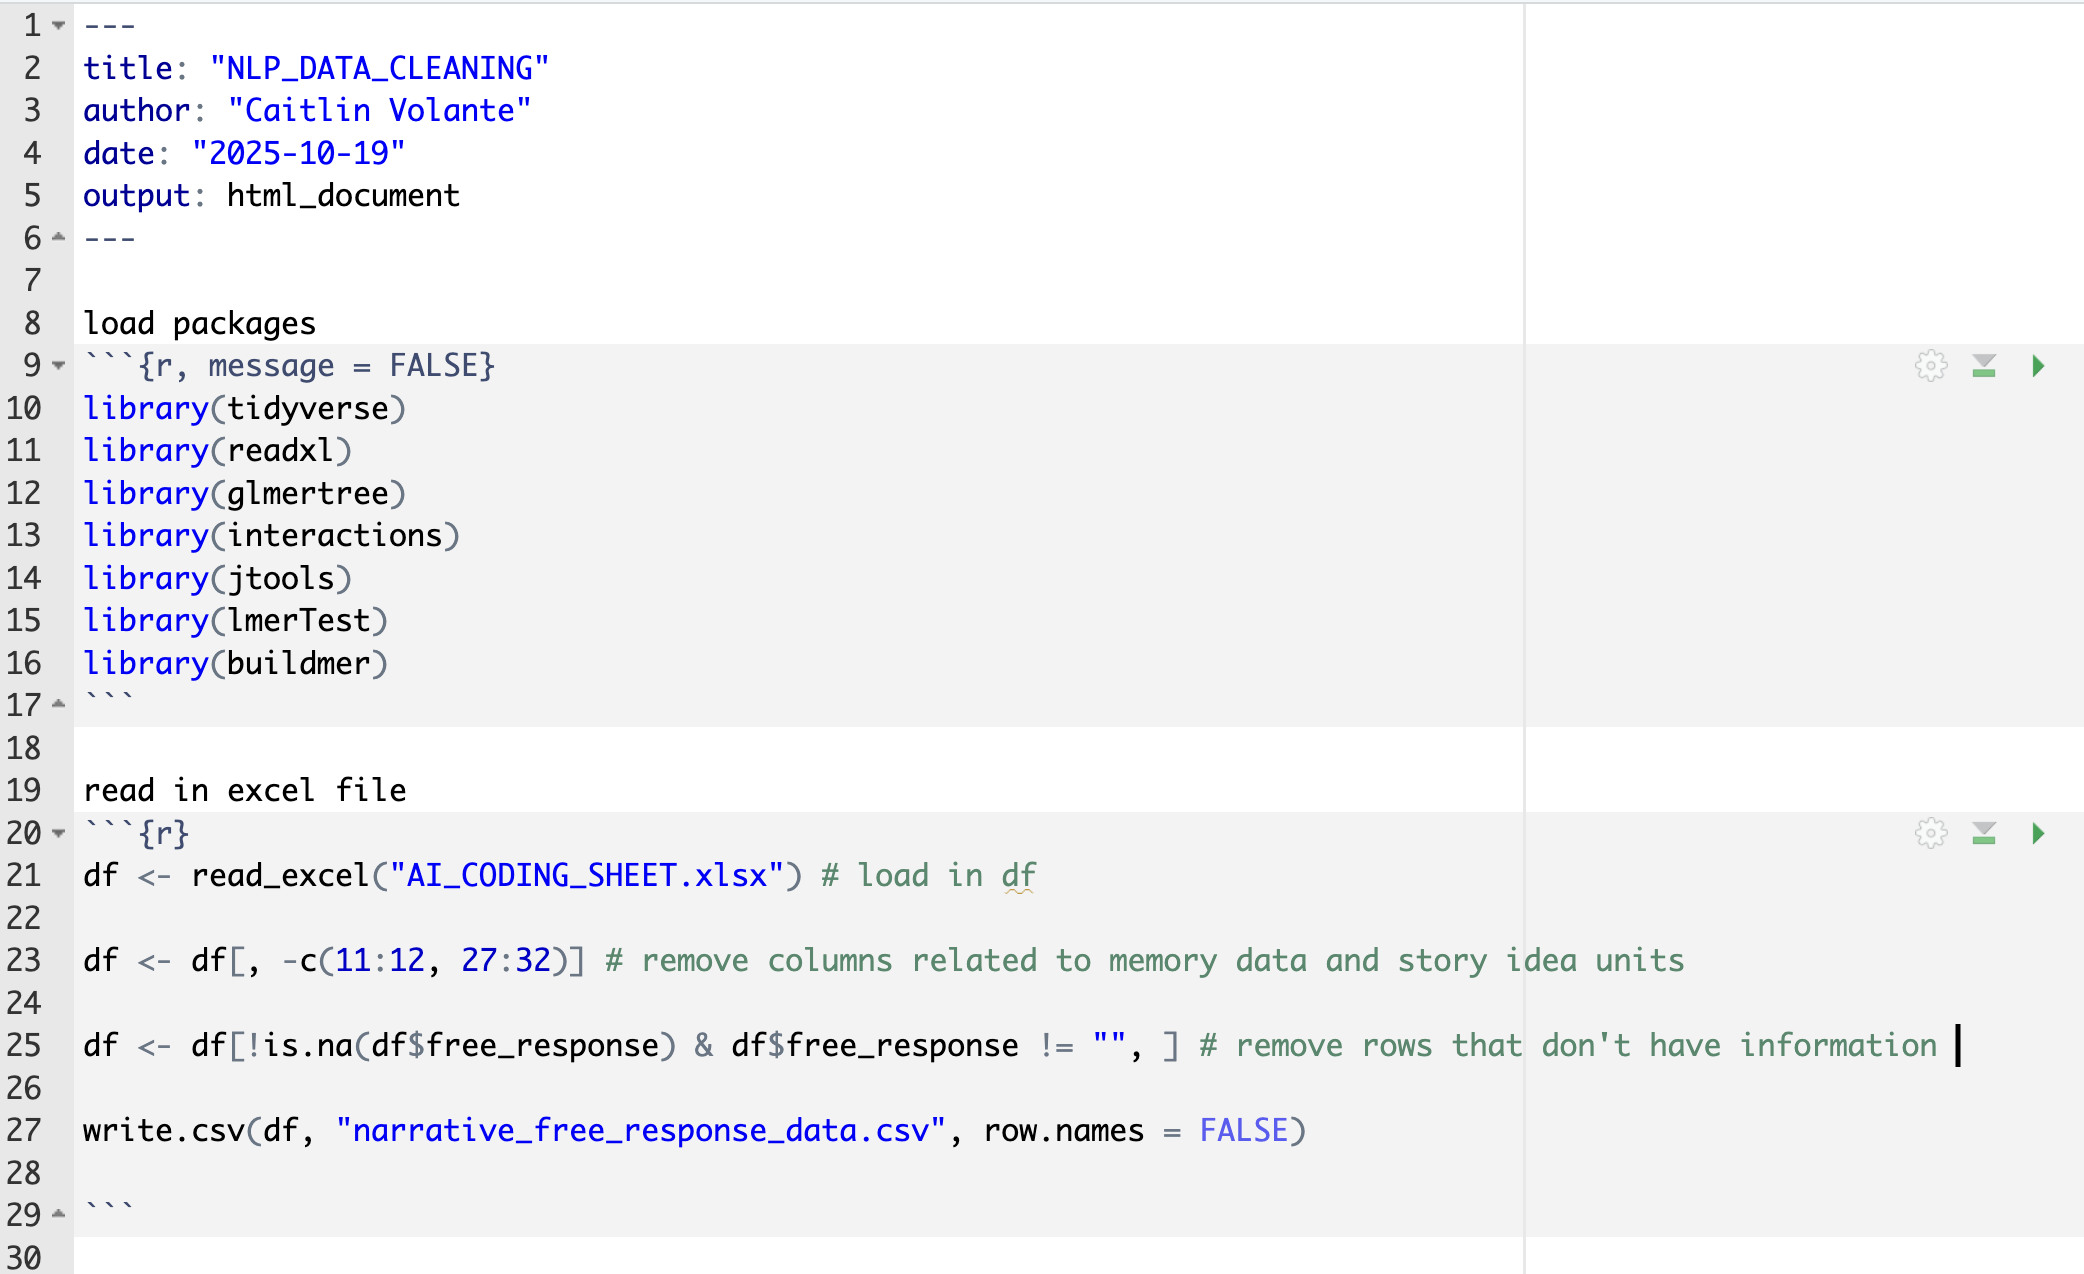

In [ ]:
free_response_data = pd.read_csv("narrative_free_response_data.csv")

In [ ]:
print(type(free_response_data))

free_response_data

<class 'pandas.core.frame.DataFrame'>


,master,id,prolific_id,unique_id,zip_file,group,order,file_name,story_name,story_condition,...,competence_scale_intelligent,competence_scale_skillful,warmth_scale_friendly,warmth_scale_well_intentioned,warmth_scale_trustworthy,warmth_scale_warm,warmth_scale_good_natured,warmth_scale_sincere,free_response,story_text
0,1,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,1,7f07-85e4-c284-0fc6_dorothy_2.webm,dorothy,low,...,4,4,4,5,3.0,4,4,4,I thought the speaker had a nice voice that co...,"In this story, Dorothy is trying to get to the..."
1,46,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,2,7f07-85e4-c284-0fc6_moppet_4.webm,moppet,medium,...,4,4,4,4,3.0,4,4,4,I thought that the speaker was well-intentione...,"In this story, there is a cat named Miss Moppe..."
2,91,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,3,7f07-85e4-c284-0fc6_bookfair_1.webm,bookfair,fluent,...,4,3,4,5,4.0,4,4,5,I thought the speaker sounded honest sincere h...,"So, I have two older sisters, Cassie and Eliza..."
3,141,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,4,7f07-85e4-c284-0fc6_food_5.webm,food,high,...,4,3,4,4,3.0,3,3,4,I thought the speaker was well-spoken and gave...,"­­­Growing up, one of the ways that our church..."
4,191,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,5,7f07-85e4-c284-0fc6_blue_3.webm,blue,normal,...,5,5,5,5,5.0,5,5,5,The speaker sounded sincere trustworthy and co...,My father's big on cars. My parents are both f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,24261,105,5f5452df72345118f58d187b,9b81-ba0c-6915-c095,03d85b71-3f97-3f1a-e3fc-c08a8f8818b2.zip,23,2,m1_blue_low.wav,blue,low,...,5,5,5,5,5.0,5,5,5,Enter your text here.I think he was a kid that...,My father's big on cars. My parents are both f...
496,24311,105,5f5452df72345118f58d187b,9b81-ba0c-6915-c095,03d85b71-3f97-3f1a-e3fc-c08a8f8818b2.zip,23,5,f2_peter_rabbit_high.wav,peterrabbit,high,...,4,4,3,4,4.0,4,5,4,Enter your text here.I think she was a good we...,"In this story, Peter Rabbit and his sisters ar..."
497,24361,105,5f5452df72345118f58d187b,9b81-ba0c-6915-c095,03d85b71-3f97-3f1a-e3fc-c08a8f8818b2.zip,23,3,m2_moppet_normal.wav,moppet,normal,...,2,2,2,3,3.0,3,3,3,Enter your text here.I think he was lacking co...,"In this story, there is a cat named Miss Moppe..."
498,24406,105,5f5452df72345118f58d187b,9b81-ba0c-6915-c095,03d85b71-3f97-3f1a-e3fc-c08a8f8818b2.zip,23,1,f3_dorothy_fluent.wav,dorothy,fluent,...,5,5,5,5,5.0,5,5,5,Enter your text here.A soft spoken competent p...,"In this story, Dorothy is trying to get to the..."


In [ ]:
free_response_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   master                         500 non-null    int64  
 1   id                             500 non-null    int64  
 2   prolific_id                    500 non-null    object 
 3   unique_id                      500 non-null    object 
 4   zip_file                       500 non-null    object 
 5   group                          500 non-null    int64  
 6   order                          500 non-null    int64  
 7   file_name                      500 non-null    object 
 8   story_name                     500 non-null    object 
 9   story_condition                500 non-null    object 
 10  competence_scale_competent     500 non-null    int64  
 11  competence_scale_confidence    500 non-null    int64  
 12  competence_scale_capable       500 non-null    int

Make id and group objects instead of integers for later analysis

In [ ]:
free_response_data['id'] = free_response_data['id'].astype('object')
free_response_data['group'] = free_response_data['group'].astype('object')

display(free_response_data[['id', 'group']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      500 non-null    object
 1   group   500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


None

Create a new column for story_condition that is numeric for later analysis

In [ ]:
condition_mapping = {
    'fluent': 1,
    'low': 2,
    'normal': 3,
    'medium': 4,
    'high': 5}

free_response_data['story_condition_numeric'] = free_response_data['story_condition'].map(condition_mapping)
display(free_response_data.head(3))

,master,id,prolific_id,unique_id,zip_file,group,order,file_name,story_name,story_condition,...,competence_scale_skillful,warmth_scale_friendly,warmth_scale_well_intentioned,warmth_scale_trustworthy,warmth_scale_warm,warmth_scale_good_natured,warmth_scale_sincere,free_response,story_text,story_condition_numeric
0,1,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,1,7f07-85e4-c284-0fc6_dorothy_2.webm,dorothy,low,...,4,4,5,3.0,4,4,4,I thought the speaker had a nice voice that co...,"In this story, Dorothy is trying to get to the...",2
1,46,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,2,7f07-85e4-c284-0fc6_moppet_4.webm,moppet,medium,...,4,4,4,3.0,4,4,4,I thought that the speaker was well-intentione...,"In this story, there is a cat named Miss Moppe...",4
2,91,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,3,7f07-85e4-c284-0fc6_bookfair_1.webm,bookfair,fluent,...,3,4,5,4.0,4,4,5,I thought the speaker sounded honest sincere h...,"So, I have two older sisters, Cassie and Eliza...",1


In [ ]:
free_response_data["free_response"]

,free_response
0,I thought the speaker had a nice voice that co...
1,I thought that the speaker was well-intentione...
2,I thought the speaker sounded honest sincere h...
3,I thought the speaker was well-spoken and gave...
4,The speaker sounded sincere trustworthy and co...
...,...
495,Enter your text here.I think he was a kid that...
496,Enter your text here.I think she was a good we...
497,Enter your text here.I think he was lacking co...
498,Enter your text here.A soft spoken competent p...


Clean the text

In [ ]:
# Remove 'Enter your text here.'
# This is left-over in the text box if participants dodn't delete it before typing their answers.

enter_text_pattern = r'(Enter your text here\.)'

free_response_data['free_response'] = free_response_data['free_response'].str.replace(enter_text_pattern, '', regex=True)

display(free_response_data['free_response'])

,free_response
0,I thought the speaker had a nice voice that co...
1,I thought that the speaker was well-intentione...
2,I thought the speaker sounded honest sincere h...
3,I thought the speaker was well-spoken and gave...
4,The speaker sounded sincere trustworthy and co...
...,...
495,I think he was a kid that was just trying his ...
496,I think she was a good well intended person th...
497,I think he was lacking confidence but tried to...
498,A soft spoken competent person.


**1.3 Sentiment Analysis**

After cleaning the data, I read in and cleaned the NRC to prepare for sentiment analysis. I decided to use the Bag of Words approach and NRC dataset instead of the Dictionary approach and anew data since my texts are so small and we probably wouldn't be able to detect anything outside of a binary positive/negative outcome. To clean the NRC data, I created a dictionary that took the first word of the column title and the words words in the column as the key and definitition and removed all NA values.

Spacy Pipeline

In [ ]:
#spaCy texts

free_response_docs = list(nlp.pipe(free_response_data.free_response))

Use the Bag of Words Approach
- Read in and clean the nrc.csv data

In [ ]:
# Read in NRC data

nrc_df = pd.read_csv('nrc.csv')

nrc_df

,Anger_NRC,Anticipation_NRC,Disgust_NRC,Fear_NRC,Joy_NRC,Negative_NRC,Positive_NRC,Sadness_NRC,Surprise_NRC,Trust_NRC
0,expletive,unfulfilled,smut,smut,tantalizing,smut,greeting,measles,greeting,proven
1,inept,tantalizing,measles,measles,felicity,expletive,tantalizing,inconsequential,unfulfilled,privy
2,unfulfilled,wait,inept,lynch,lovable,measles,inventor,unfulfilled,tantalizing,pawn
3,lynch,haste,perverted,militia,unbeaten,inept,felicity,lynch,trump,lovable
4,agitation,unbeaten,lynch,servile,superstar,perverted,civility,gray,unbeaten,merchant
...,...,...,...,...,...,...,...,...,...,...
3319,NaN,NaN,NaN,NaN,NaN,revive,NaN,NaN,NaN,NaN
3320,NaN,NaN,NaN,NaN,NaN,lace,NaN,NaN,NaN,NaN
3321,NaN,NaN,NaN,NaN,NaN,schism,NaN,NaN,NaN,NaN
3322,NaN,NaN,NaN,NaN,NaN,annoy,NaN,NaN,NaN,NaN


In [ ]:
# Data put into dictionaries (which is easier to access)

nrc_dict = {} #empty ditionary
for col_name, col_data in nrc_df.items(): #uses .items to iterate over columns
  # Keep the part before the underscore and lowercase it
  new_col_name = col_name.split('_')[0].lower() #splits column name on '_' and accesses first element and lowers it

  # Let's also remove nan values
  new_col_data = col_data.dropna()

  # put into dictionary
  nrc_dict[new_col_name] = new_col_data.tolist() #uses tolist to add columns and values to dictionary

print(nrc_dict["positive"][0:11]) #first 12 values for positive
print(nrc_dict["positive"][-11:]) #last 12

['greeting', 'tantalizing', 'inventor', 'felicity', 'civility', 'artistic', 'lovable', 'restful', 'unbeaten', 'superstar', 'tutelage']
['adaptable', 'community', 'success', 'salutary', 'quaint', 'revive', 'lace', 'truce', 'candidate', 'endowment', 'structure']


In [ ]:
# print first five keys and values

i = 0
for key, val in nrc_dict.items():
    print(f"Key: {key}, \nValues: {val}")
    i += 1
    if i == 5:
        break

Key: anger, 
Values: ['expletive', 'inept', 'unfulfilled', 'lynch', 'agitation', 'wrongdoing', 'satanic', 'militia', 'bellows', 'warden', 'complicate', 'opera', 'death', 'shoplifting', 'excitation', 'frenetic', 'unlawful', 'stifled', 'miserable', 'penalty', 'obliterated', 'reproach', 'grated', 'offender', 'devastation', 'wring', 'dissension', 'condemn', 'explode', 'thoughtless', 'sting', 'fleece', 'vengeful', 'segregate', 'subsidy', 'abomination', 'revolting', 'exaggerate', 'hellish', 'disrespect', 'delay', 'delinquent', 'crusade', 'disgusting', 'disobedient', 'duel', 'annihilate', 'antisocial', 'oppression', 'banger', 'grumpy', 'obliterate', 'inequality', 'dumps', 'tree', 'dismay', 'mortality', 'defy', 'disease', 'harassing', 'accused', 'bad', 'skirmish', 'gall', 'combatant', 'hot', 'horrible', 'frightful', 'unfair', 'tolerate', 'coercion', 'backbone', 'adversary', 'misconception', 'thump', 'criminal', 'devastating', 'berserk', 'blatant', 'corrupting', 'reversal', 'bastion', 'blast', 

To calculate the positive and negative sentiment values in the data, I tokenized the free responses and looped through eac hdoc to identify which tokens were considered positive and negative per the NRC dictionary. After counting all the positive and negative words, I divided by the number of words in the free response, making sure to use our safe divide function so that any zeros wouldn't return an error. After that, I appended the positive and negative scores to the dataframe in new columns called NRC_positive and MRC_negative.

After calculating the positive and negative sentiment scores, I exported the dataframe to do the final analysis of the data in R.

In [ ]:
# safe divide function to stop zero counts for words from causing problems
# some texts may have zero words after pre-processing

def safe_divide(a, b):
    if b != 0:
        return a/b
    else:
        return 0

In [ ]:
# Extract terms with emotion

final_nw = []
final_positive = []
final_negative = []

for doc in free_response_docs: #go through each document
  negative_count = 0
  positive_count = 0
  words = 0
  for token in doc: #go through each token in the document
    if not token.is_punct and not token.is_space:
      words += 1
      if token.lower_ in nrc_dict["negative"]: # get the lower case words
        negative_count += 1
      if token.lower_ in nrc_dict["positive"]:
        positive_count += 1
  final_positive.append(safe_divide(positive_count, words)) #divide by number of words that have concreteness scores
  final_negative.append(safe_divide(negative_count, words))
  final_nw.append(words)

In [ ]:
free_response_data['NW'] = final_nw #create a new column in pandas called NW and assign it the values from final_nw
free_response_data['NRC_positive'] = final_positive
free_response_data['NRC_negative'] = final_negative

free_response_data.head(3)

,master,id,prolific_id,unique_id,zip_file,group,order,file_name,story_name,story_condition,...,warmth_scale_trustworthy,warmth_scale_warm,warmth_scale_good_natured,warmth_scale_sincere,free_response,story_text,story_condition_numeric,NW,NRC_positive,NRC_negative
0,1,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,1,7f07-85e4-c284-0fc6_dorothy_2.webm,dorothy,low,...,3.0,4,4,4,I thought the speaker had a nice voice that co...,"In this story, Dorothy is trying to get to the...",2,41,0.097561,0.000000
1,46,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,2,7f07-85e4-c284-0fc6_moppet_4.webm,moppet,medium,...,3.0,4,4,4,I thought that the speaker was well-intentione...,"In this story, there is a cat named Miss Moppe...",4,33,0.090909,0.030303
2,91,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,3,7f07-85e4-c284-0fc6_bookfair_1.webm,bookfair,fluent,...,4.0,4,4,5,I thought the speaker sounded honest sincere h...,"So, I have two older sisters, Cassie and Eliza...",1,23,0.173913,0.043478


In [ ]:
# Save the dataframe to a CSV file
# index=False prevents writing the dataframe index as a column
free_response_data.to_csv('sentiment_free_response_data.csv', index=False)

In [ ]:
average_nw = free_response_data['NW'].mean()
print(f"The average number of words in the free responses is: {average_nw}")

The average number of words in the free responses is: 30.376


**1.3.1 Mixed-Effects Models completed in R**

To determine any causal relationship between the level of disfuencies in a passage and speaker positive and negative sentiment towards the speaker, I conducted two linear mixed effects models with story condition treated at a linear variable.

Results from a linear mixed effects model predicting positvie sentiment scores as a function of story condition with ID, group (Latin Square Order) and story as random effects found that story condition was not a significant predictor for positive sentiment score (beta = -0.0029, SE = 0.0017, t = -1.71, p = 0.089). This suggests that level of dislfuency in the passage had no effect on participant's positive impressions towards the speaker.

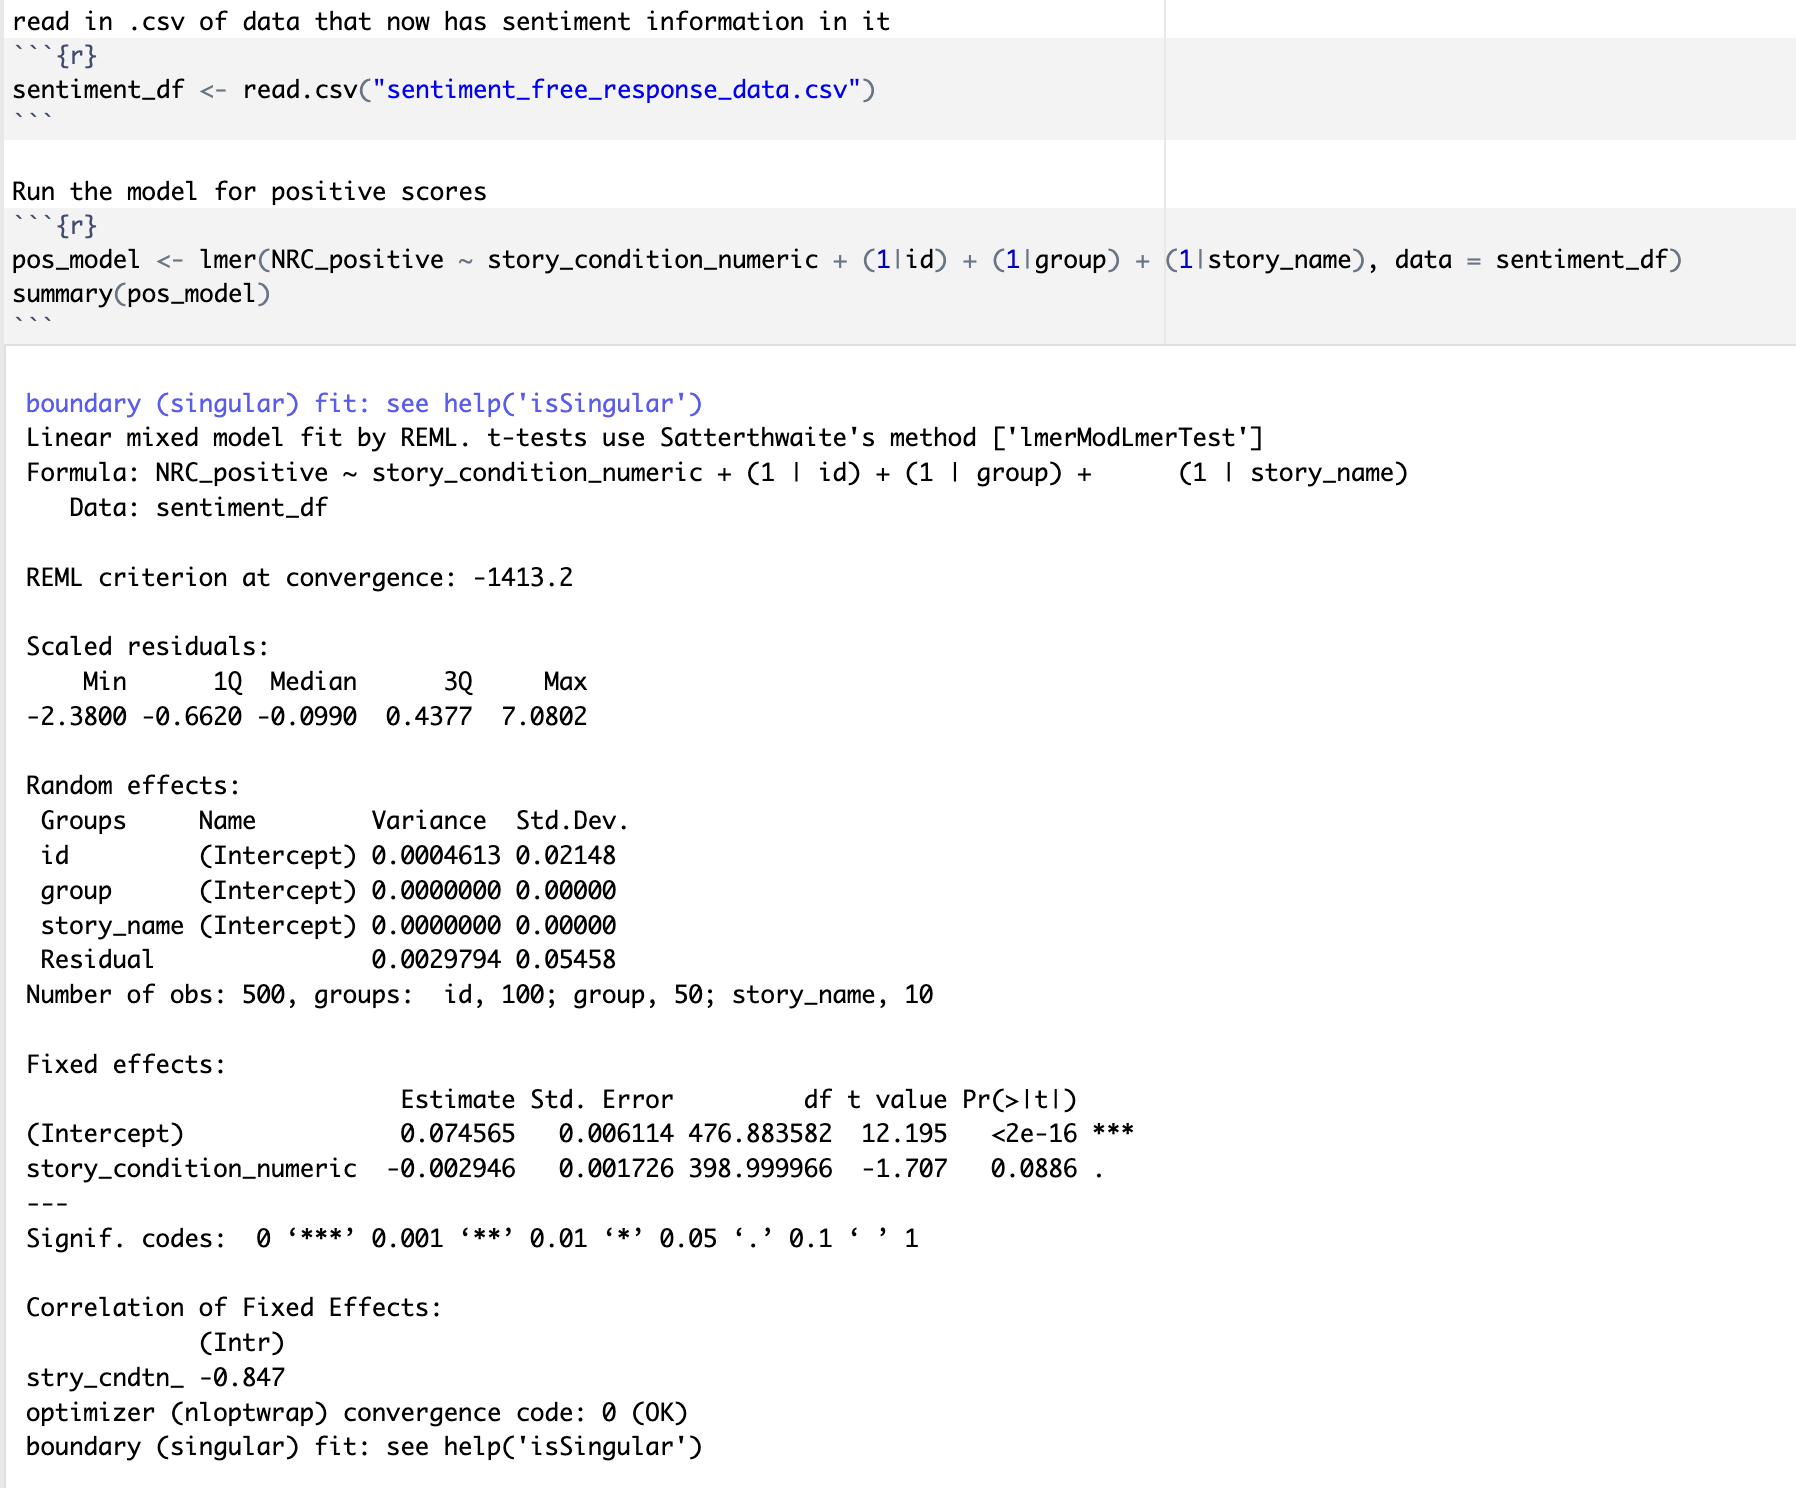

Results from a linear mixed effects model predicting negative sentiment scores as a function of story condition with ID, group (Latin Square Order) and story as random effects found that story condition was not a significant predictor for negative sentiment score (beta = -0.0001, SE = 0.000091, t = 1.10, p = 0.27). This suggests that level of dislfuency in the passage had no effect on participant's negative impressions towards the speaker.

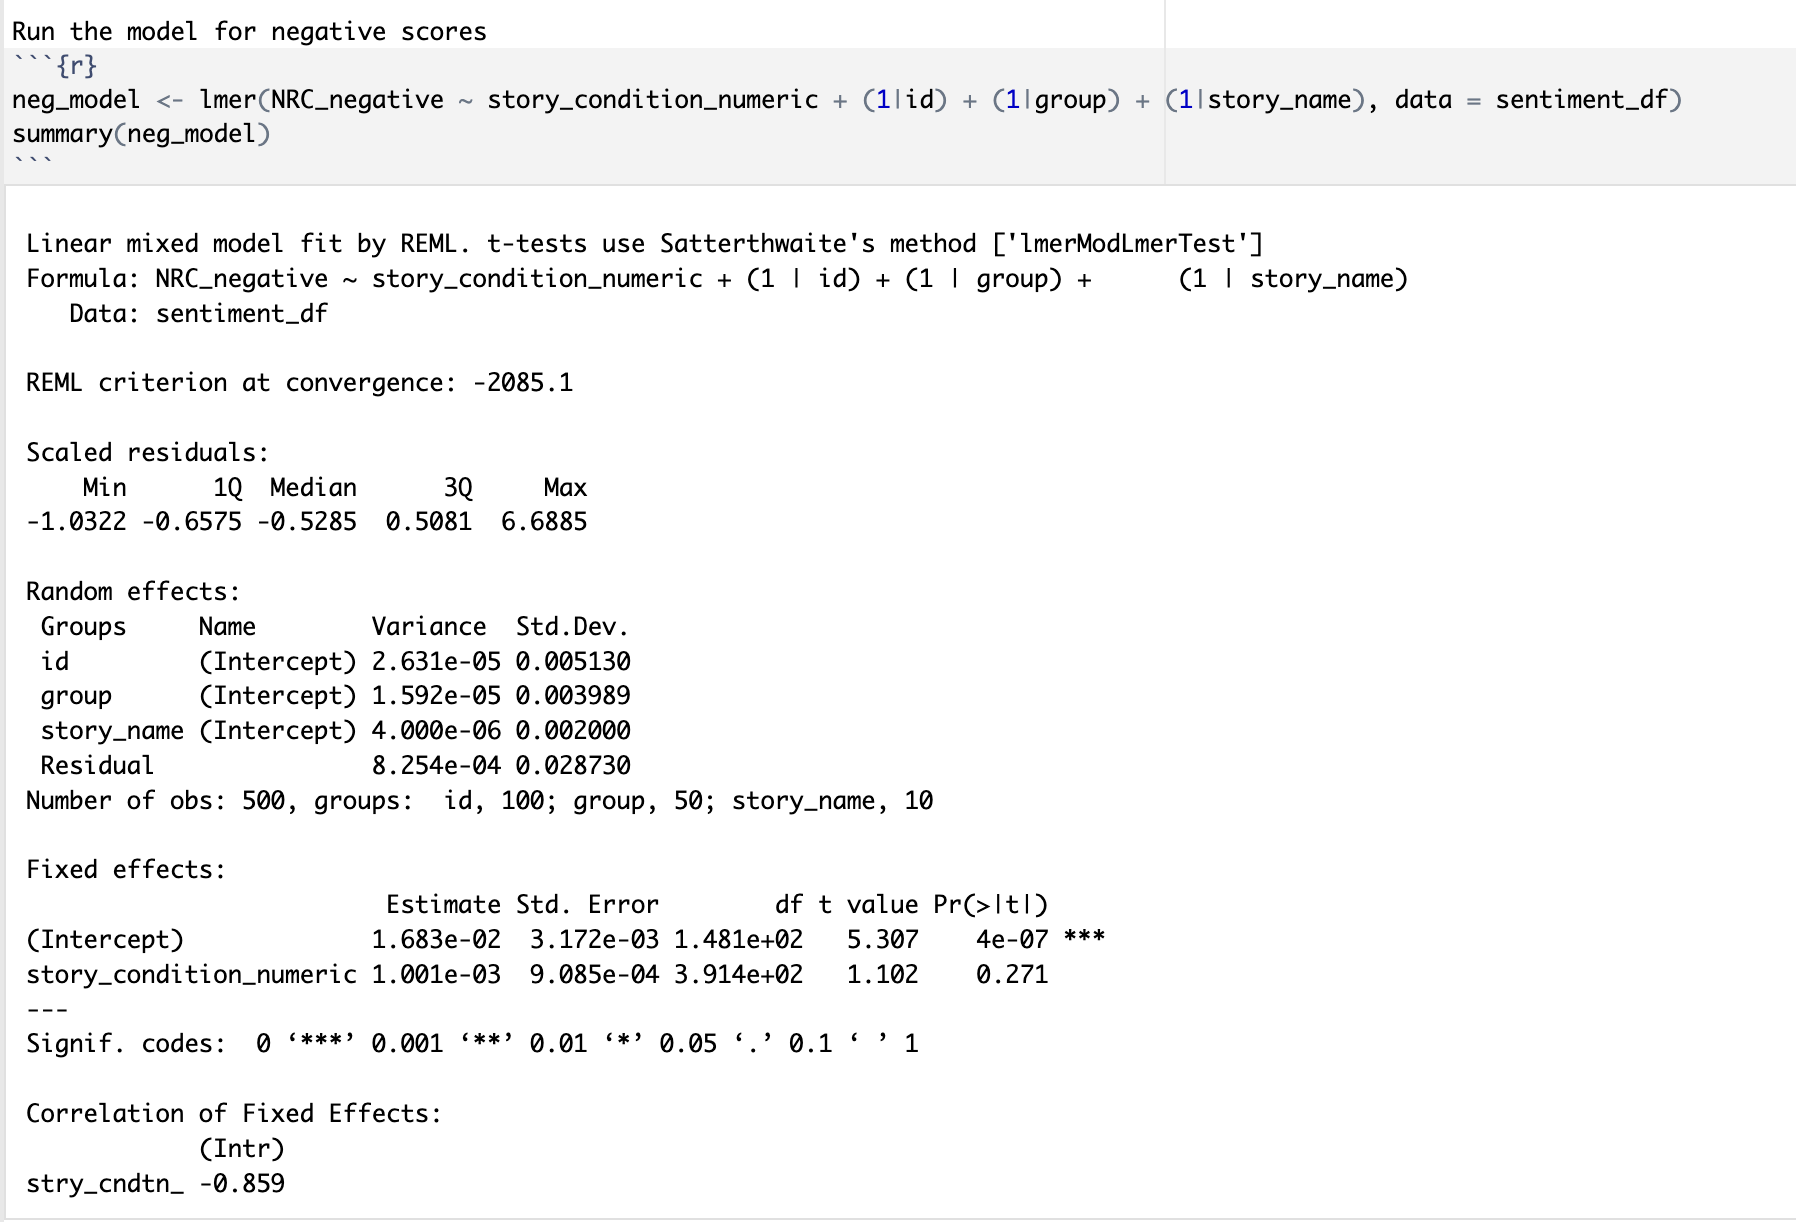

**Graph of Positive and Negative Sentiment over Story Conditions**

Finally, I created a graphic visualization of the data. While it does look like the trend for positive and negative sentiment is going in the hypothesized direction, down and up, respectively, results from the above models shows that these trends are non-significant.

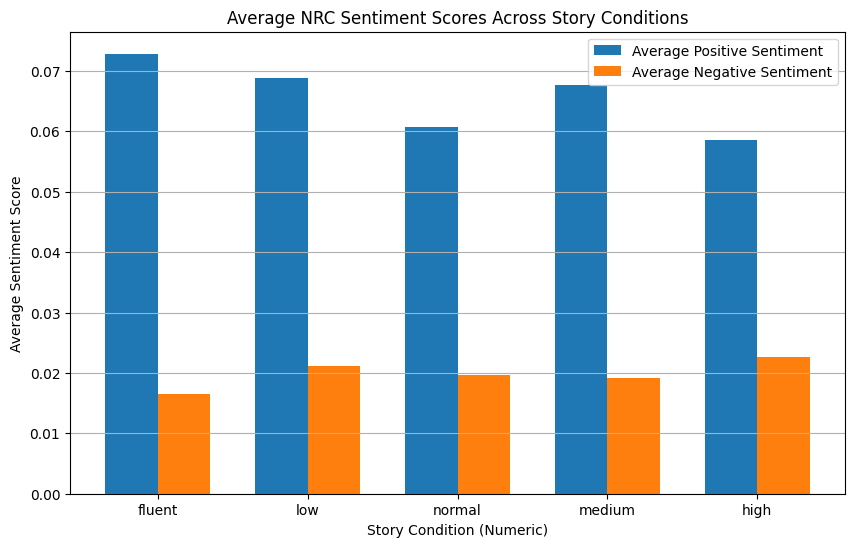

In [ ]:
sentiment_means = free_response_data.groupby('story_condition_numeric')[['NRC_positive', 'NRC_negative']].mean().reset_index()

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = sentiment_means['story_condition_numeric']

plt.bar(index - bar_width/2, sentiment_means['NRC_positive'], bar_width, label='Average Positive Sentiment')
plt.bar(index + bar_width/2, sentiment_means['NRC_negative'], bar_width, label='Average Negative Sentiment')

plt.title('Average NRC Sentiment Scores Across Story Conditions')
plt.xlabel('Story Condition (Numeric)')
plt.ylabel('Average Sentiment Score')
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['fluent', 'low', 'normal', 'medium', 'high'])
plt.legend()
plt.grid(axis='y')
plt.show()

**1.4 Discussion**

The goal of this analysis was to investigate how listener's impressions towards a speaker changed as the level of disfluency in a passage increased. The present analysis aimed to extend previously shown effects that low levels of disfluency can influence listener judgments of confidence and competence (Brennan & Williams, 1995; Kirkland et al., 2023), by examining the level of filled pauses present in a passage along continuum. Contrary to our intial hypotheses that higher levels of disfluency would promote less positive and more negative sentiment, results from the mixed-effects models revealed no significant relationship between disfluency level and either positive or negative sentiment toward the speaker. While there seems to be a visually weak trend toward more negative and less positive impressions as disfluency increases, these effects did not reach statistical significance. One possible reason why we didn't see any significant effects here could be due to the size of our individual responses. With an average of 30 words per response, and a median of 26, it is likely that we simply didn't have enough text for our analysis to be able to pick up on any effects, if they are present. One way to increase text size and potentially reach higher power could be to ask participants to answer specific questions related to their thoughts about the speaker, as opposed to our single, open-ended, admittedly vauge ask, "Please tell us what you think about this speaker". Another reason why we might not have seen any effects could be due to the size of the NRC dictionary we used, which is not all-encompassing. A larger dictionary might have greater nuance in determing sentiment in the texts.